# Визуализация данных на карте

[Источник](https://opensourc.es/blog/covid-19)

[Репка со статами](https://github.com/CSSEGISandData/COVID-19)

In [ ]:
using Pkg
pkgs = ["Plots", "CSV", "DataFrames", "Shapefile", "Luxor", "ColorSchemes"]

for p in pkgs
    Pkg.add(p)
end

In [2]:
cd(s"C:\Users\User\Desktop\Mycop")

In [47]:
download("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", "covid.csv")

"covid.csv"

In [ ]:
using DataFrames, CSV

In [50]:
function summarize_data()
    df = CSV.read("covid.csv"; copycols=true)
    select!(df, Not(Symbol("Province/State")))
    select!(df, Not(:Lat))
    select!(df, Not(:Long))
    rename!(df, Symbol("Country/Region") => :Country)
    
    for row in eachrow(df)
        if row[:Country] == "Hong Kong"
            row[:Country] = "Mainland China"
        end
    end
    
    df
end

df1 = summarize_data()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Afghanistan,0,0,0,0,0,0,0
2,Albania,0,0,0,0,0,0,0
3,Algeria,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,0
5,Angola,0,0,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0,0,0
7,Argentina,0,0,0,0,0,0,0
8,Armenia,0,0,0,0,0,0,0
9,Australia,0,0,0,0,0,0,0


In [52]:
names(df1)[end]

Symbol("4/7/20")

In [53]:
findfirst(x-> x == "Russia", df1[!, 1] )

188

In [54]:
df1[188, :]

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
188,Russia,0,0,0,0,0,0,0,0


In [67]:
using Dates

In [89]:
datezstr = [ "$el" for el in names(df1)[2:end] ] # из символов в спроки

dformat = Dates.DateFormat("mm/dd/yy")

datez =  Dates.Date.(datezstr, dformat) .+ Dates.Year(2000) # в формат дат для графиков

77-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮         
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07

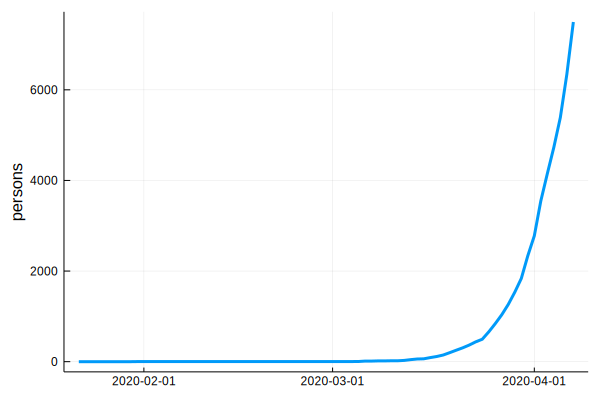

In [91]:
#using Plots
confd = Vector(df1[188, :])[2:end]
plot(datez, confd, legend = false, line = 3, yaxis = "persons")

In [93]:
df1

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Afghanistan,0,0,0,0,0,0,0
2,Albania,0,0,0,0,0,0,0
3,Algeria,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,0
5,Angola,0,0,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0,0,0
7,Argentina,0,0,0,0,0,0,0
8,Armenia,0,0,0,0,0,0,0
9,Australia,0,0,0,0,0,0,0


In [95]:
for row in eachrow(df1)
    if row[:Country] == "Hong Kong"
        row[:Country] = "Mainland China"
    end
end

adf = aggregate(df1, :Country, sum) # объединили регионы в страны

,Country,1/22/20_sum,1/23/20_sum,1/24/20_sum,1/25/20_sum,1/26/20_sum
,String,Int64,Int64,Int64,Int64,Int64
1,Afghanistan,0,0,0,0,0
2,Albania,0,0,0,0,0
3,Algeria,0,0,0,0,0
4,Andorra,0,0,0,0,0
5,Angola,0,0,0,0,0
6,Antigua and Barbuda,0,0,0,0,0
7,Argentina,0,0,0,0,0
8,Armenia,0,0,0,0,0
9,Australia,0,0,0,0,4


In [96]:
dates = names(adf)[2:end]
for date in dates
    col_name = string(date)[1:end-4]
    parts = split(col_name, "/")
    col_name = "$(parts[2]).$(parts[1]).$(parts[3])"
    rename!(adf, date => Symbol(col_name))
end
for row in eachrow(adf)
    if row[:Country] == "Mainland China"
        row[:Country] = "China"
    elseif row[:Country] == "US"
        row[:Country] = "United States"
    elseif row[:Country] == "UK"
        row[:Country] = "United Kingdom"
    end
end
CSV.write("summarized.csv", adf)

"summarized.csv"

# Рисуем карту

данные для границ качаем тута https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1/data
нужно закинуть в рабочую директорию .csv и .shp

In [ ]:
using Shapefile, Luxor
using ColorSchemes

include(joinpath(dirname(pathof(Luxor)), "readshapefiles.jl"))

In [146]:
function draw_corona_map(outputfilename, countryoutlines, countries, corona_data, date)
    Drawing(768, 432, outputfilename) # размер картинки
    background("darkblue")
    origin()
    scale(2.5, 2.5) # масштаб карты

    setcolor("white")
    for country in countries
        pgons, bbox = convert(Array{Luxor.Point, 1}, countryoutlines.shapes[country.second])
        for pgon in pgons
            poly(pgon, :fill)
        end
    end

    for row in eachrow(corona_data)
        country = row[:Country]
        cases = row[date]
        if haskey(countries, country)
            id = countries[country]
            color = get(colorschemes[:hot], log10(cases), (0.0, 5.5))
            setcolor((color.r,color.g,color.b))
            pgons, bbox = convert(Array{Luxor.Point, 1}, countryoutlines.shapes[id])
            for pgon in pgons
                poly(pgon, :fill)
            end
        end
    end
    
    finish()
end

draw_corona_map (generic function with 1 method)

In [135]:
worldshapefile = "Countries_WGS84.shp"
countries = CSV.read("Countries_WGS84.csv")
corona_data = CSV.read("summarized.csv")
countries_dict = Dict{String, Int}()
for row in eachrow(countries)
    countries_dict[row[:CNTRY_NAME]] = row[:OBJECTID]
end

worldshapes = open(worldshapefile) do f
    read(f, Shapefile.Handle)
end;

In [147]:
date = Symbol("22.1.20")
draw_corona_map("corona-map.png", worldshapes, countries_dict, corona_data, date)
# в рабочей директории появилось картинко

true

насоздовываем кучу картинок для анимации

In [148]:
start_date = Date(2020,1,22)
dates = Vector{Symbol}(undef, ncol(corona_data)-1)
for i=0:ncol(corona_data)-2
    new_date = start_date + Dates.Day(i)
    dates[i+1] = Symbol(Dates.format(new_date, "d.m.yy"))
end
t = 0
for date in dates
    fname_pad = lpad(t, 3, "0")
    draw_corona_map("images/corona-map-$fname_pad.png", worldshapes, countries_dict, corona_data, date)
    t += 1
end